## Creating a Neural Network

In [2]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

## Dataset
For this tutorail we will use the MNIST Fashion Dataset. This is a dataset that is included in keras.

This dataset include 60,000 images for training and 10,000 images for validation/testing.

In [7]:
fashion_mnist = keras.datasets.fashion_mnist    # load dataset
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()    # split into testing and training

In [14]:
type(train_images), train_images.shape

# shape = (60000, 28, 28) --> we have 60,000 images and each images contain 28*28 pixel

(numpy.ndarray, (60000, 28, 28))

So we've got 60,000 images that are made up fo 28*28 pixels (784 in total)

In [11]:
train_images[0,23,23]   # Get the pixel from image 0 row 23 column 23

194

Our pixel values are between 0 and 255, 0 being black and 255 being white. This means we have a grayscale image as there are no color channels

In [15]:
train_labels[:10]   # let's have a look at the first 10 training labels

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

In [16]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

Finally let's look at what some of these images look like!

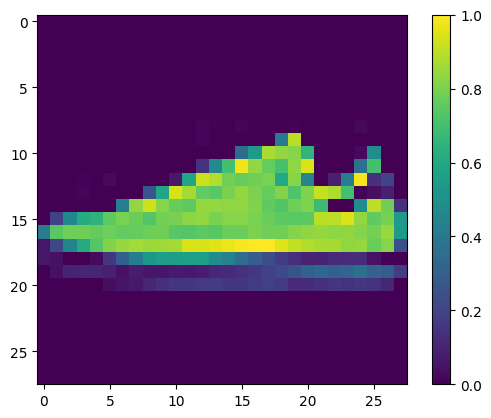

In [29]:
fig = plt.figure()
plt.imshow(train_images[6]);
plt.colorbar();
plt.grid(False)
plt.show()

## Data Preprocessing

The last step before creating our model is to preprocess our data. This simply means applying some prior transformations to our data before feeding it the model. 

In this case we will simply scale all of our greyscale pixel values (0-255) to be between [0,1]. We can do this by dividing each value in the training and testing sets by 255.0. We do this because smaller values will make it easier for the model to process our values.

In [31]:
train_images = train_images / 255.0

test_images = test_images / 255.0

## Building the Model

In [175]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape = (28,28)),    # input layer (1) --> tranform 28*28 pixels into single value of 784 pixels.
    keras.layers.Dense(128, activation = "relu"),   # hidden layer (2) --> 128 depends on the problem/ we can change it to the different value.
    keras.layers.LeakyReLU(alpha = 0.1),
    keras.layers.Dense(10, activation = "softmax")  # output layer (3) --> 10 is the number of class that we need to predict. 
                                                    # use "softmax" to make sure that our result it will between [0,1] or probabillity of each class
])

**Layer 1:** This is our input layer and it will conist of 784 neurons. We use the flatten layer with an input shape of (28,28) to denote that our input should come in in that shape. The flatten means that our layer will reshape the shape (28,28) array into a vector of 784 neurons so that each pixel will be associated with one neuron.

**Layer 2:** This is our first and only hidden layer. The *dense* denotes that this layer will be fully connected and each neuron from the previous layer connects to each neuron of this layer. It has 128 neurons and uses the rectify linear unit activation function.

**Layer 3:** This is our output later and is also a dense layer. It has 10 neurons that we will look at to determine our models output. Each neuron represnts the probabillity of a given image being one of the 10 different classes. The activation function *softmax* is used on this layer to calculate a probabillity distribution for each class. This means the value of any neuron in this layer will be between 0 and 1, where 1 represents a high probabillity of the image being that class.

## Complie the Model
The last step in building the model is to define the loss function, optimizer and metrics we would like to track. I won't go into detail about why we choose each of these right now.

In [176]:
model.compile(optimizer = "adam",
              loss = "sparse_categorical_crossentropy",
              metrics = ["accuracy"])

In [177]:
history = model.fit(train_images, train_labels, epochs = 50)

Epoch 1/50
1875/1875 [==============================] - 1s 485us/step - loss: 2.3027 - accuracy: 0.1006
Epoch 2/50
1875/1875 [==============================] - 1s 482us/step - loss: 2.3019 - accuracy: 0.1092
Epoch 3/50
1875/1875 [==============================] - 1s 491us/step - loss: 2.2994 - accuracy: 0.1206
Epoch 4/50
1875/1875 [==============================] - 1s 497us/step - loss: 2.2928 - accuracy: 0.1692
Epoch 5/50
1875/1875 [==============================] - 1s 481us/step - loss: 2.2807 - accuracy: 0.1975
Epoch 6/50
1875/1875 [==============================] - 1s 485us/step - loss: 2.2631 - accuracy: 0.2096
Epoch 7/50
1875/1875 [==============================] - 1s 500us/step - loss: 2.2408 - accuracy: 0.2120
Epoch 8/50
1875/1875 [==============================] - 1s 482us/step - loss: 2.2149 - accuracy: 0.2071
Epoch 9/50
1875/1875 [==============================] - 1s 485us/step - loss: 2.1866 - accuracy: 0.2124
Epoch 10/50
1875/1875 [==============================] - 1s 485u

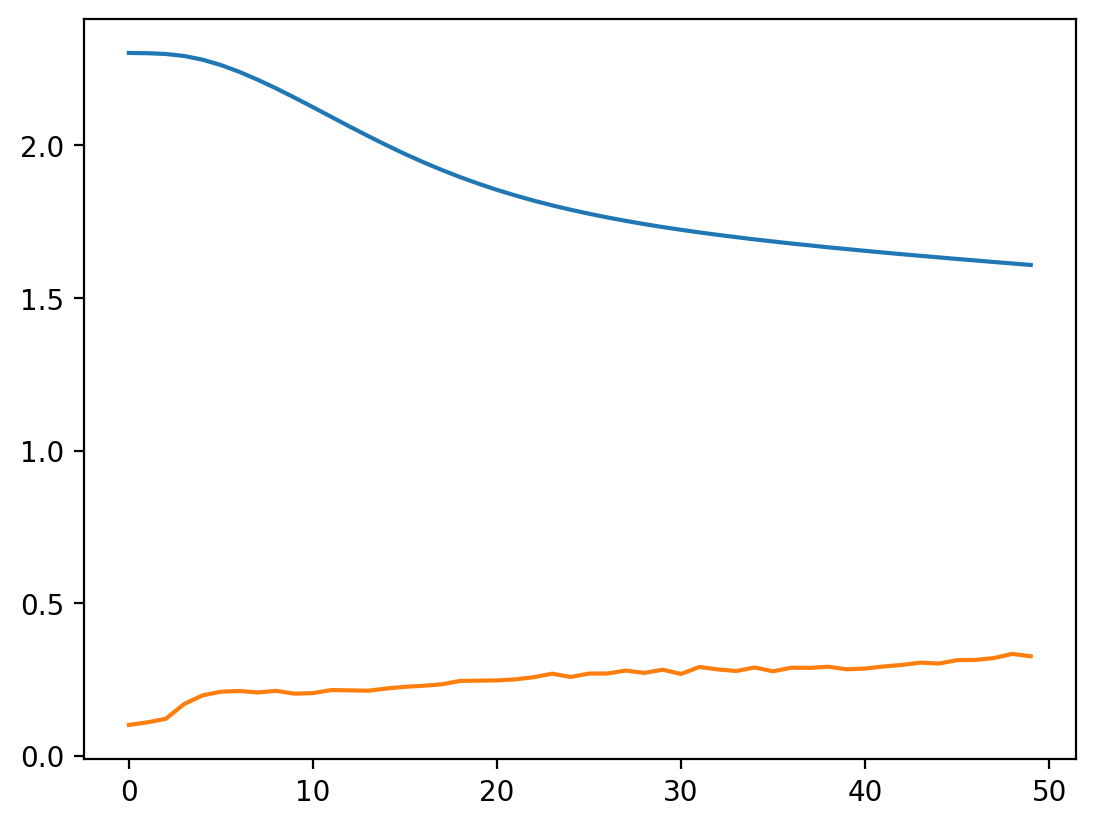

In [178]:
fig = plt.figure(dpi = 200)
plt.plot(range(50), history.history["loss"]);
plt.plot(range(50), history.history["accuracy"]);

In [179]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose = 1)

print("Test accuracy: ",test_acc)

313/313 [==============================] - 0s 354us/step - loss: 1.6046 - accuracy: 0.3580
Test accuracy:  0.3580000102519989


## Make prediction

1/1 [==============================] - 0s 11ms/step


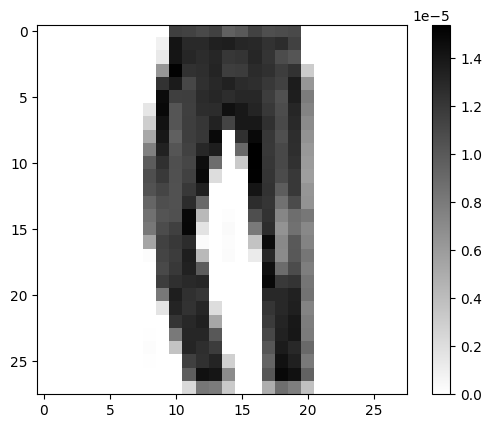

Accuracy: 21.70
Expected Class: Trouser
Prediction Class: Trouser


In [181]:
img_index = 5
prediction = model.predict(np.array([test_images[img_index]]))    # We need to input array of image to model.predict --> np.array([test_images[img_index]])
fig = plt.figure()
plt.imshow(test_images[img_index], cmap = plt.cm.binary);
plt.colorbar();
plt.grid(False)
plt.show()
print("Accuracy: {:.2f}\nExpected Class: {}\nPrediction Class: {}".format((np.max(prediction) * 100), class_names[test_labels[img_index]], class_names[np.argmax(prediction)]))